In [ ]:
import pandas as pd
import re
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab import data_table
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def read_csv(path:str):
    file = open(path, "r").read()
    ix = []
    ctx = []

    for row in file.split("\n"):
        l = re.sub(',(?!(?=[^"]*"[^"]*(?:"[^"]*"[^"]*)*$))', "\t", row)
        try:
            lk = l.split("\t")
            if len(lk)>2 and len(lk[0])<6:
                p,q= lk[0], lk[1]
                ix.append(p)
                ctx.append(q)
            else:
                lk=row.replace('"', " ")
                lk=lk.split(",")
                p,q = lk[0], lk[1]
                ix.append(p)
                ctx.append(q)
        except Exception as e:
            print("Exception occurred!.", e)
            print(f"Length of ids obtained: {len(ix)}, and text: {len(ctx)}")

    df = pd.DataFrame()
    df["CommentId"]=ix[1:]
    df["commentText"]=ctx[1:]
    df = df.astype(dtype={"CommentId":int, "commentText":str})
    return df

# %time df = read_csv("../input/multilingualabusivecomment/ShareChat-IndoML-Datathon-NSFW-CommentChallenge_Test_20_Percent_NoLabel.csv")
# df.tail()

Data Visualisation

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ShareChat-IndoML-Datathon-NSFW-CommentChallenge_Train.csv', error_bad_lines=False)
%time test = read_csv('/content/drive/MyDrive/Colab Notebooks/ShareChat-IndoML-Datathon-NSFW-CommentChallenge_Test_NoLabel.csv')
data_table.DataTable(data,include_index=False,num_rows_per_page=10)

In [ ]:
test.shape

(641035, 2)

In [ ]:
data.isnull().sum()

CommentId                 0
commentText               1
language                195
user_index              201
post_index              205
report_count_comment    208
report_count_post       212
like_count_comment      217
like_count_post         218
label                   219
dtype: int64

In [ ]:
data = data.dropna(how='any', axis=0)
data.shape

(1483286, 10)

In [ ]:
data.columns

Index(['CommentId', 'commentText', 'language', 'user_index', 'post_index',
       'report_count_comment', 'report_count_post', 'like_count_comment',
       'like_count_post', 'label'],
      dtype='object')

In [ ]:
data['language'].value_counts(normalize=True)

Hindi         0.332548
English       0.116975
Malayalam     0.108512
Telugu        0.098174
Tamil         0.085324
Punjabi       0.068695
Kannada       0.054439
Bengali       0.031354
Odia          0.025383
Bhojpuri      0.025312
Marathi       0.020679
Gujarati      0.015779
Haryanvi      0.008797
Rajasthani    0.003478
Assamese      0.002403
Urdu          0.002148
Name: language, dtype: float64

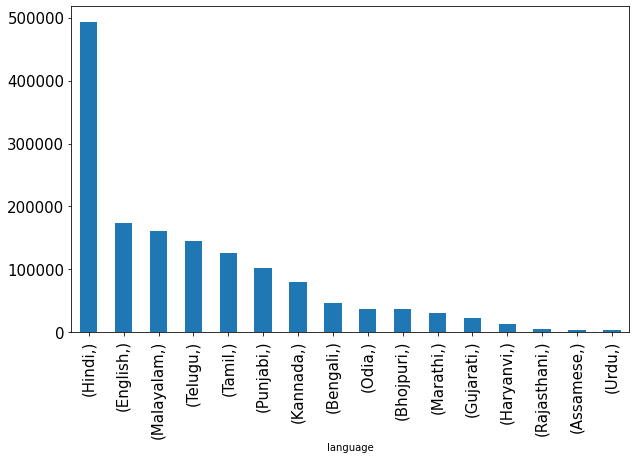

In [ ]:
lang_df = pd.DataFrame(data['language'])
lang_cnt = lang_df.value_counts()
lang_cnt.plot.bar(figsize=(10,6), fontsize=15)

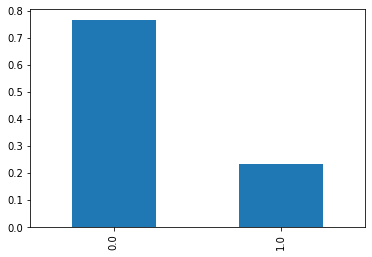

In [ ]:
data['label'].value_counts(normalize=True).plot.bar()

Data Preprocessing and Normalisation

In [ ]:
!pip install emoji

     |████████████████████████████████| 170 kB 5.2 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=ae095922c397d2820b5f7ff19267669f20d1f36a8680eb8e6e0e7114f2381819
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
Successfully built emoji


In [ ]:
import re

In [ ]:
# Remove emojis from comments

import emoji
def give_emoji_free_text(text):
    return text.encode('ascii', 'ignore').decode('ascii')

data['commentText'] = data['commentText'].apply(lambda x: give_emoji_free_text(x))
test['commentText'] = test['commentText'].apply(lambda x: give_emoji_free_text(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
# Lower casing comments
data['commentText'] = data['commentText'].str.lower()
test['commentText'] = test['commentText'].str.lower()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
from sklearn import preprocessing
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
# Removal of Stop words
stop_words = set(stopwords.words('english'))
def removing_stopwords(text):
  return ' '.join([word for word in str(text).split() if word not in stop_words])
data['commentText'] = data['commentText'].apply(lambda text: removing_stopwords(text))
test['commentText'] = test['commentText'].apply(lambda text: removing_stopwords(text))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
# Removal of Punctuations
punctuations_list = string.punctuation
def removing_punctuations(text):
  translator = str.maketrans('', '', punctuations_list)
  return text.translate(translator)
data['commentText'] = data['commentText'].apply(lambda text: removing_punctuations(text))
test['commentText'] = test['commentText'].apply(lambda text: removing_punctuations(text))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Removing whitespaces, tabs, and newlines..
data['commentText'] = data['commentText'].str.replace('\n', '')
data['commentText'] = data['commentText'].str.replace('\t', ' ')
data['commentText'] = data['commentText'].str.replace(' {2,}', ' ', regex=True)
data['commentText'] = data['commentText'].str.strip()

test['commentText'] = test['commentText'].str.replace('\n', '')
test['commentText'] = test['commentText'].str.replace('\t', ' ')
test['commentText'] = test['commentText'].str.replace(' {2,}', ' ', regex=True)
test['commentText'] = test['commentText'].str.strip()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
# Removing URLs
data['commentText'] = data['commentText'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
test['commentText'] = test['commentText'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Removal of Numbers
def removing_numbers(data):
    return re.sub('[0-9]+', '', data)
data['commentText'] = data['commentText'].apply(lambda x: removing_numbers(x))
test['commentText'] = test['commentText'].apply(lambda x: removing_numbers(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
# Removal of Repeating characters
def removing_repeating_char(text):
  return re.sub(r'(.)1+', r'1', text)
data['commentText'] = data['commentText'].apply(lambda text: removing_repeating_char(text))
test['commentText'] = test['commentText'].apply(lambda text: removing_repeating_char(text))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
# Drop empty rows
data['commentText'].astype(bool)
data = data[data['commentText'].astype(bool)]

In [ ]:
data.shape

(1177371, 10)

In [ ]:
test.shape

(641035, 2)

In [ ]:
# Word tokenisation
data['commentText'] = data['commentText'].apply(word_tokenize)
test['commentText'] = test['commentText'].apply(word_tokenize)

In [ ]:
data['commentText']

0                                       [randi, ka, deewana]
2          [apni, pant, utar, kar, apni, chut, bhi, bata,...
3          [krishnatripathi, jesi, ghar, ki, sabhyata, va...
4          [randi, ko, dusra, kaam, nahi, hai, kuttiya, k...
6                                    [good, night, di, nice]
                                 ...                        
1483499                                         [next, part]
1483501                                              [pavam]
1483502                         [enik, ind, post, ittittila]
1483503                                 [nirmelp, parayilla]
1483504                                              [ettan]
Name: commentText, Length: 1177371, dtype: object

In [ ]:
# Stemming
stemmer = nltk.PorterStemmer()
def stemming_on_text(data):
  text = [stemmer.stem(word) for word in data]
  return text
data['commentText'] = data['commentText'].apply(lambda x: stemming_on_text(x))
test['commentText'] = test['commentText'].apply(lambda x: stemming_on_text(x))

In [ ]:
# Lemmatization
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
data['commentText'] = data['commentText'].apply(lambda x: lemmatizer_on_text(x))
test['commentText'] = test['commentText'].apply(lambda x: lemmatizer_on_text(x))

In [ ]:
test.shape

(641035, 2)

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [ ]:
X=data['commentText']
Y=data['label']

1. Naive Bayes

In [ ]:
#  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
X_test = test['commentText']

In [ ]:
# Build the model
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [ ]:
# Train the model using the training data
model.fit(X.apply(lambda x: ' '.join(x)), Y)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [ ]:
# Predict the categories of the test data
predicted_labels = model.predict(X_test.apply(lambda x: ' '.join(x)))

In [ ]:
labels = pd.DataFrame(predicted_labels, columns=['Label'])
commentId = pd.DataFrame(test['CommentId'], columns=['CommentId'])

In [ ]:
submission = pd.DataFrame()
submission['CommentId'] = commentId['CommentId']
submission['Label']= labels['Label']

In [ ]:
submission

In [ ]:
submission.to_csv('/content/drive/MyDrive/Colab Notebooks/submission_naivebayes.csv', sep='\t', index=None)

In [ ]:
# print("The accuracy is {}".format(accuracy_score(Y_test, predicted_labels)))
# print("The f1_score - micro is {}".format(f1_score(Y_test, predicted_labels, average='micro')))
# print("The f1_score - macro is {}".format(f1_score(Y_test, predicted_labels, average='macro')))
# print("The f1_score - weighted is {}".format(f1_score(Y_test, predicted_labels, average='weighted')))

2. SGD Classifier

In [ ]:
X_test = test['commentText']

In [ ]:
model1 = make_pipeline(TfidfVectorizer(), SGDClassifier())

In [ ]:
model1.fit(X.apply(lambda x: ' '.join(x)), Y)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('sgdclassifier', SGDClassifier())])

In [ ]:
predicted_labels1 = model1.predict(X_test.apply(lambda x: ' '.join(x)))

In [ ]:
# print("The accuracy is {}".format(accuracy_score(Y_test, predicted_labels1)))
# print("The f1_score - micro is {}".format(f1_score(Y_test, predicted_labels1, average='micro')))
# print("The f1_score - macro is {}".format(f1_score(Y_test, predicted_labels1, average='macro')))
# print("The f1_score - weighted is {}".format(f1_score(Y_test, predicted_labels1, average='weighted')))

In [ ]:
labels = pd.DataFrame(predicted_labels1, columns=['Label'])
commentId = pd.DataFrame(test['CommentId'], columns=['CommentId'])

In [ ]:
submission = pd.DataFrame()
submission['CommentId'] = commentId['CommentId']
submission['Label']= labels['Label']

In [ ]:
submission

In [ ]:
submission.to_csv('/content/drive/MyDrive/Colab Notebooks/submission_sgd.csv', sep='\t', index=None)

3. Logistic Regression

In [ ]:
X_test = test['commentText']

In [ ]:
model2 = make_pipeline(TfidfVectorizer(), LogisticRegression())

In [ ]:
model2.fit(X.apply(lambda x: ' '.join(x)), Y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('logisticregression', LogisticRegression())])

In [ ]:
predicted_labels2 = model2.predict(X_test.apply(lambda x: ' '.join(x)))

In [ ]:
labels = pd.DataFrame(predicted_labels2, columns=['Label'])
commentId = pd.DataFrame(test['CommentId'], columns=['CommentId'])

In [ ]:
submission = pd.DataFrame()
submission['CommentId'] = commentId['CommentId']
submission['Label']= labels['Label']

In [ ]:
submission

In [ ]:
submission.to_csv('/content/drive/MyDrive/Colab Notebooks/submission_logistic.csv', sep='\t', index=None)

In [ ]:
# print("The accuracy is {}".format(accuracy_score(Y_test, predicted_labels2)))
# print("The f1_score - micro is {}".format(f1_score(Y_test, predicted_labels2, average='micro')))
# print("The f1_score - macro is {}".format(f1_score(Y_test, predicted_labels2, average='macro')))
# print("The f1_score - weighted is {}".format(f1_score(Y_test, predicted_labels2, average='weighted')))

Accuracy

In [ ]:
pip install matplotlib

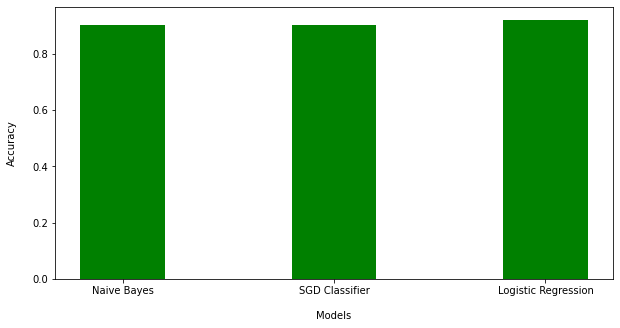

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = {'Naive Bayes':0.9030257989170825, 'SGD Classifier':0.9030257989170825, 'Logistic Regression':0.9206667374455887}
models = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(models, values, color ='green',
        width = 0.4)

plt.ylabel("Accuracy", labelpad=15)
plt.xlabel("Models", labelpad=15)
plt.show()

f1_Score

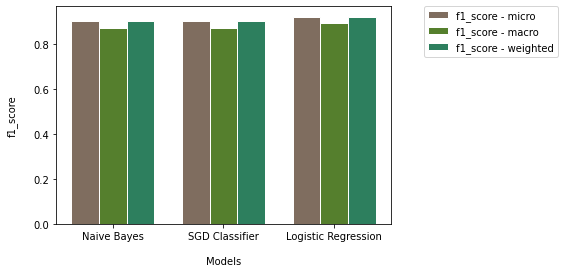

In [ ]:
barWidth = 0.25

bars1 = [0.9030257989170823, 0.9030257989170823, 0.9206667374455887]
bars2 = [0.8697635654235085, 0.8697635654235085, 0.8916123613334379]
bars3 = [0.9019712081793534, 0.9019712081793534, 0.9190731269837794]

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='f1_score - micro')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='f1_score - macro')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='f1_score - weighted')

plt.xticks([r + barWidth for r in range(len(bars1))], ['Naive Bayes', 'SGD Classifier', 'Logistic Regression'])

plt.xlabel('Models', labelpad=15)
plt.ylabel('f1_score', labelpad=15)

plt.legend(bbox_to_anchor= (1.5, 1), loc='upper right', borderaxespad=0)
plt.show() 

Word Cloud

In [ ]:
# # Python program to generate WordCloud

# # importing all necessary modules
# from wordcloud import WordCloud, STOPWORDS
# import matplotlib.pyplot as plt
# import pandas as pd

# df = pd.read_csv(r"ShareChat-IndoML-Datathon-NSFW-CommentChallenge_Train.csv", encoding ="latin-1")

# comment_words = ''
# stopwords = set(STOPWORDS)

# # iterate through the csv file
# for val in df.CONTENT:
	
# 	# typecaste each val to string
# 	val = str(val)

# 	# split the value
# 	tokens = val.split()
	
# 	# Converts each token into lowercase
# 	for i in range(len(tokens)):
# 		tokens[i] = tokens[i].lower()
	
# 	comment_words += " ".join(tokens)+" "

# wordcloud = WordCloud(width = 800, height = 800,
# 				background_color ='white',
# 				stopwords = stopwords,
# 				min_font_size = 10).generate(comment_words)

# # plot the WordCloud image					
# plt.figure(figsize = (8, 8), facecolor = None)
# plt.imshow(wordcloud)
# plt.axis("off")
# plt.tight_layout(pad = 0)

# plt.show()
